In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import os
import glob

In [2]:

df = pd.read_csv('Phase1_Provenance.csv')


df['id'] = df['id'].replace('', None).fillna(method='ffill')


df['to'] = df['to'].replace('', None)
df['from'] = df['from'].replace('', None)

empty_rows = df['from'].isna() & df['to'].isna()

distance_to_next = empty_rows[::-1].cumsum()[::-1] - empty_rows.cumsum()

df['to'] = df['to'].fillna(method='bfill', limit=int(distance_to_next.max()))
df['from'] = df['from'].fillna(method='bfill', limit=int(distance_to_next.max()))


df.to_csv('Phase1_Provenance_Cleaned.csv', index=False)

print("File has been cleaned and saved as 'Phase1_Provenance_Cleaned.csv'")

/var/folders/t8/_2vv47_s12d49vpmvrkng3c80000gn/T/ipykernel_16544/759084603.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['id'] = df['id'].replace('', None).fillna(method='ffill')
/var/folders/t8/_2vv47_s12d49vpmvrkng3c80000gn/T/ipykernel_16544/759084603.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['to'] = df['to'].fillna(method='bfill', limit=int(distance_to_next.max()))
/var/folders/t8/_2vv47_s12d49vpmvrkng3c80000gn/T/ipykernel_16544/759084603.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['from'] = df['from'].fillna(method='bfill', limit=int(distance_to_next.max()))


File has been cleaned and saved as 'Phase1_Provenance_Cleaned.csv'


In [ ]:

df = pd.read_csv('Phase2_Provenance.csv')


df['id'] = df['id'].replace('', None).fillna(method='ffill')


df['to'] = df['to'].replace('', None)
df['from'] = df['from'].replace('', None)

empty_rows = df['from'].isna() & df['to'].isna()

distance_to_next = empty_rows[::-1].cumsum()[::-1] - empty_rows.cumsum()

df['to'] = df['to'].fillna(method='bfill', limit=int(distance_to_next.max()))
df['from'] = df['from'].fillna(method='bfill', limit=int(distance_to_next.max()))


df.to_csv('Phase2_Provenance_Cleaned.csv', index=False)

print("File has been cleaned and saved as 'Phase1_Provenance_Cleaned.csv'")

df_attack = df

/var/folders/t8/_2vv47_s12d49vpmvrkng3c80000gn/T/ipykernel_22049/3743361912.py:1: DtypeWarning: Columns (24,27,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Phase2_Provenance.csv')
/var/folders/t8/_2vv47_s12d49vpmvrkng3c80000gn/T/ipykernel_22049/3743361912.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['id'] = df['id'].replace('', None).fillna(method='ffill')
/var/folders/t8/_2vv47_s12d49vpmvrkng3c80000gn/T/ipykernel_22049/3743361912.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['to'] = df['to'].fillna(method='bfill', limit=int(distance_to_next.max()))
/var/folders/t8/_2vv47_s12d49vpmvrkng3c80000gn/T/ipykernel_22049/3743361912.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

File has been cleaned and saved as 'Phase1_Provenance_Cleaned.csv'


In [6]:
df_combined = pd.concat(map(pd.read_csv, ['Phase1_Provenance_Cleaned.csv', 'Phase2_Provenance_Cleaned.csv']), ignore_index=True)


/var/folders/t8/_2vv47_s12d49vpmvrkng3c80000gn/T/ipykernel_22049/3060278382.py:1: DtypeWarning: Columns (24,27,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_combined = pd.concat(map(pd.read_csv, ['Phase1_Provenance_Cleaned.csv', 'Phase2_Provenance_Cleaned.csv']), ignore_index=True)


In [171]:
to_look  = ['source', 'command line', 'exe', 'event id', 'time', 'epoch', 'protocol', 'remote port']
filtered_df = df[to_look]
filtered_df

source                                 command line  \
0       syscall                                          NaN   
1       syscall         /bin/sh /etc/network/if-up.d/ethtool   
2       syscall                                          NaN   
3       syscall                                          NaN   
4       syscall                                          NaN   
...         ...                                          ...   
196730  syscall  /bin/systemd-tty-ask-password-agent --watch   
196731  syscall                                          NaN   
196732  syscall                                          NaN   
196733  syscall                                          NaN   
196734  syscall                                          NaN   

                                            exe  event id          time  \
0                                 /usr/bin/dash       NaN           NaN   
1                                 /usr/bin/dash       NaN           NaN   
2                                           NaN     246.0  1.701469e+09   
3                                           NaN       NaN           NaN   
4                                           NaN     246.0  1.701469e+09   
...                                         ...       ...           ...   
196730  /usr/bin/systemd-tty-ask-password-agent       NaN           NaN   
196731                                      NaN  404003.0  1.701728e+09   
196732                                      NaN       NaN           NaN   
196733                                      NaN  404003.0  1.701728e+09   
196734                                      NaN  404003.0  1.701728e+09   

        epoch protocol  remote port  
0         NaN      NaN          NaN  
1         NaN      NaN          NaN  
2         NaN      NaN          NaN  
3         0.0      NaN          NaN  
4         NaN      NaN          NaN  
...       ...      ...          ...  
196730    NaN      NaN          NaN  
196731    NaN      NaN          NaN  
196732    0.0      NaN          NaN  
196733    NaN      NaN          NaN  
196734    NaN      NaN          NaN  

[196735 rows x 8 columns]

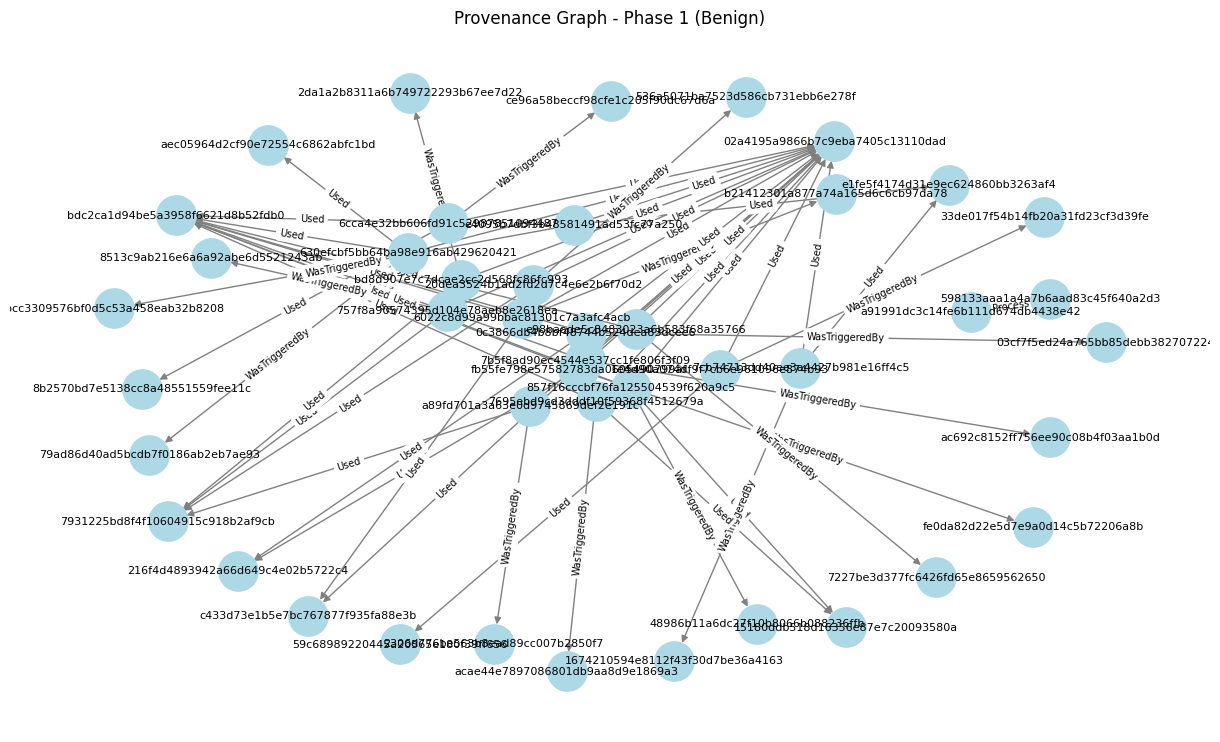

In [3]:
import networkx as nx

df = pd.read_csv("Phase1_Provenance_Cleaned.csv")[0:100]
df = df.fillna('')

G = nx.DiGraph()


for _, row in df.iterrows():
    G.add_node(row["from"], label=row["type"]) 
    G.add_node(row["to"], label=row["type"])   
    G.add_edge(row["from"], row["to"], label=row["type"])  

# Visualize the graph
plt.figure(figsize=(12, 7))
pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=800, font_size=8)


edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

plt.title("Provenance Graph - Phase 1 (Benign)")
plt.show()

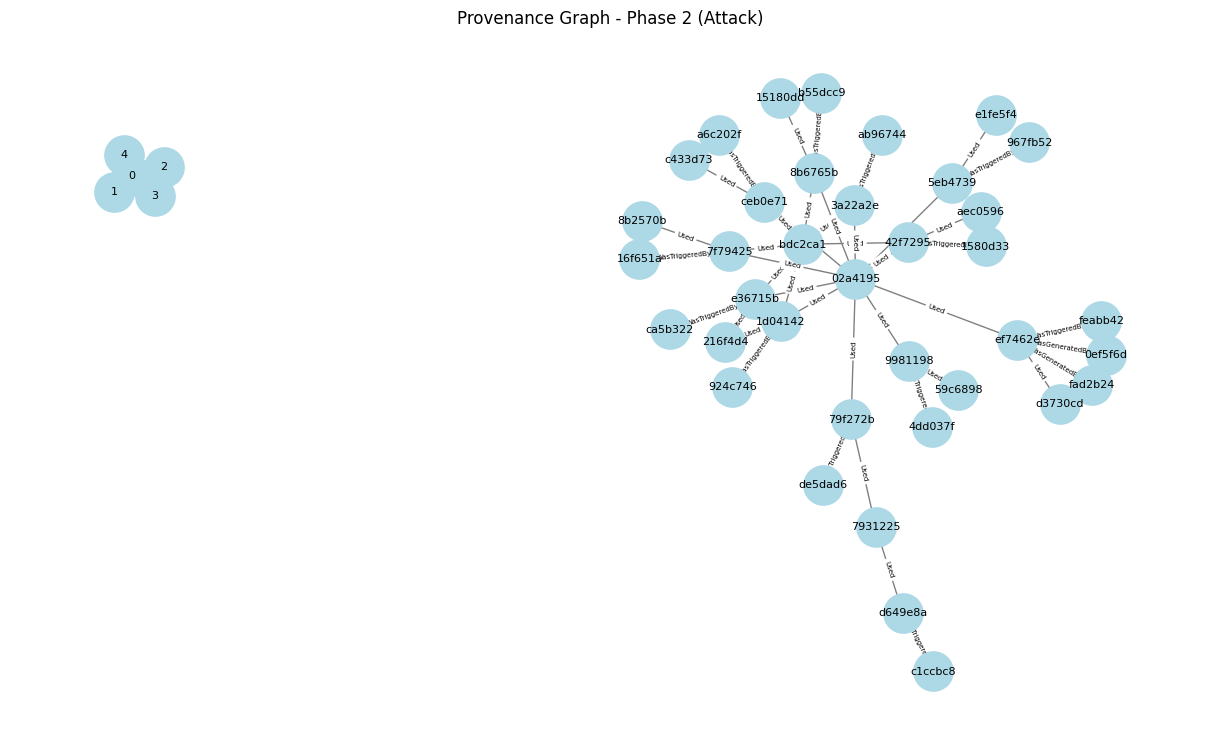

In [173]:
import networkx as nx


dtype_mapping = {
    'flags': str,  
    'protocol': str,  
    'sublabel': int 
}

df = pd.read_csv("Phase2_Provenance_Cleaned.csv", dtype=dtype_mapping, low_memory = False)[0:80]
df = df.fillna('')

G = nx.complete_graph(5)



for _, row in df.iterrows():
    G.add_node(row["from"], label=row["type"]) 
    G.add_node(row["to"], label=row["type"])   
    G.add_edge(row["from"], row["to"], label=row["type"])  

# Visualize the graph
plt.figure(figsize=(12, 7))

mapping = {node: str(node)[:7] for node in G.nodes()}
G = nx.relabel_nodes(G, mapping)

pos = nx.spring_layout(G, seed = 43)

nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=800, font_size=8)


# tuple_list = []
# for i in edge_labels:
#     tuple = (i[0][:4],i[1][:4])
#     tuple_list.append(tuple)


# edge_label_list = list(edge_labels.items())


# for i in range(len(tuple_list)):
#    edge_label_list[i] = (tuple_list[i],edge_label_list[i][1])

# edge_lables = dict(edge_label_list)
# edge_lables

edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=5)

plt.title("Provenance Graph - Phase 2 (Attack)")
plt.show()

### Assign weights based on event frequency and detect rare but significant events

In [4]:
df = pd.read_csv("Phase1_Provenance_Cleaned.csv")
df = df.fillna('')

G = nx.DiGraph()

for _, row in df.iterrows():
    source, target, event_type = row["from"], row["to"], row["type"]
    
    if G.has_edge(source, target):
        G[source][target]["weight"] += 1
    else:
        G.add_edge(source, target, weight=1, event_type = event_type)

#Frequently occurred events
high_weight_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:10]
print("Top weighted edges (frequently occurring events):", high_weight_edges)

#rare/anomal eventsΩ
rare_events = [(u, v, d) for u, v, d in G.edges(data=True) if d["event_type"] == "PrivilegeEscalation"]
print("Rare but significant events:", rare_events)

Top weighted edges (frequently occurring events): [('cd0813274ef046cf6ef72a2349f2bef3', 'dd92fe204ef9671aa2d023b5d3b214a8', {'weight': 18889, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', '8ba1082bd7d385ba25e5c3e70dc998c4', {'weight': 16296, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', '01a78ea0003ea00791315d72301e7422', {'weight': 13930, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', 'acc78d38a6778183865533d690f24112', {'weight': 12015, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', '7405697383da5aa06083fef098e40d82', {'weight': 10025, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', '068368628cb430b65d5277c259de7507', {'weight': 7953, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', 'f2268c214d8f3ec89910e3bbd539a030', {'weight': 6683, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', '5fadefce0701c7c4fb86f8584cecc449', {'weight': 6504, 'event_type': 'Process'}), ('cd0813

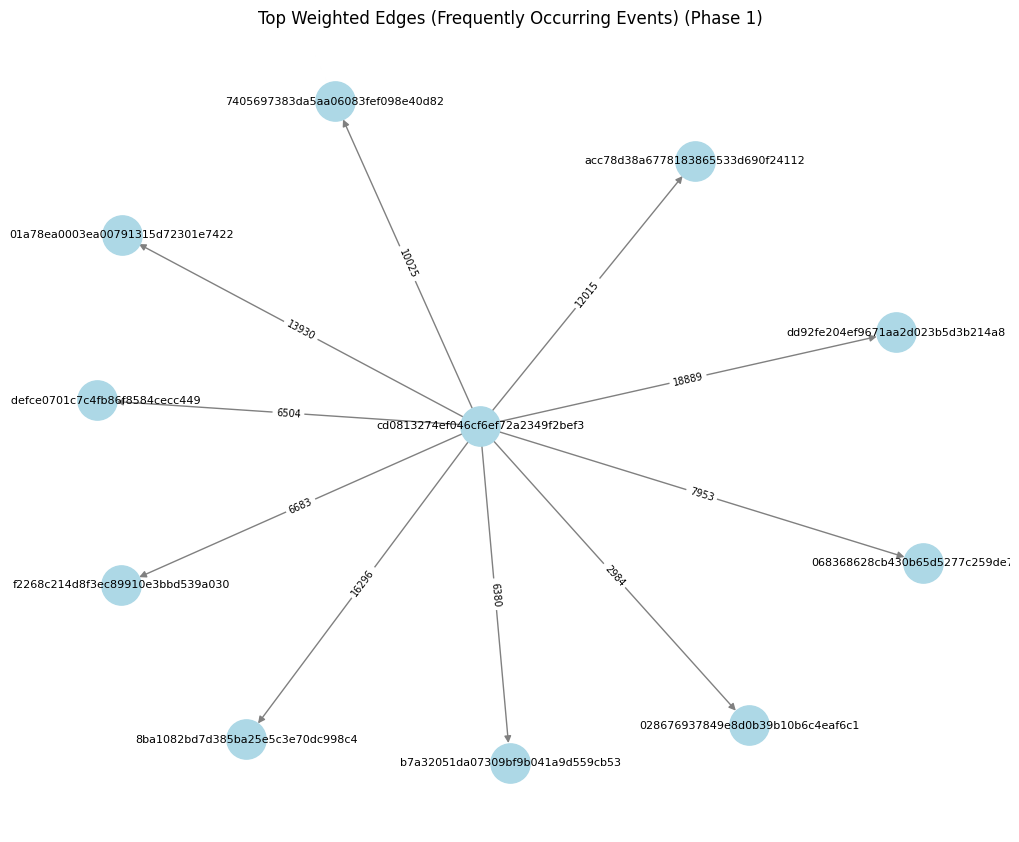

In [5]:
H = nx.DiGraph()
for u, v, d in high_weight_edges:
    H.add_edge(u, v, weight=d['weight'], event_type=d['event_type'])

# Generate positions for the nodes
pos = nx.spring_layout(H, seed=42)

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(H, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=800, font_size=8)

# Add edge labels to show weights
edge_labels = nx.get_edge_attributes(H, "weight")
nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_size=7)

plt.title("Top Weighted Edges (Frequently Occurring Events) (Phase 1)")
plt.show()

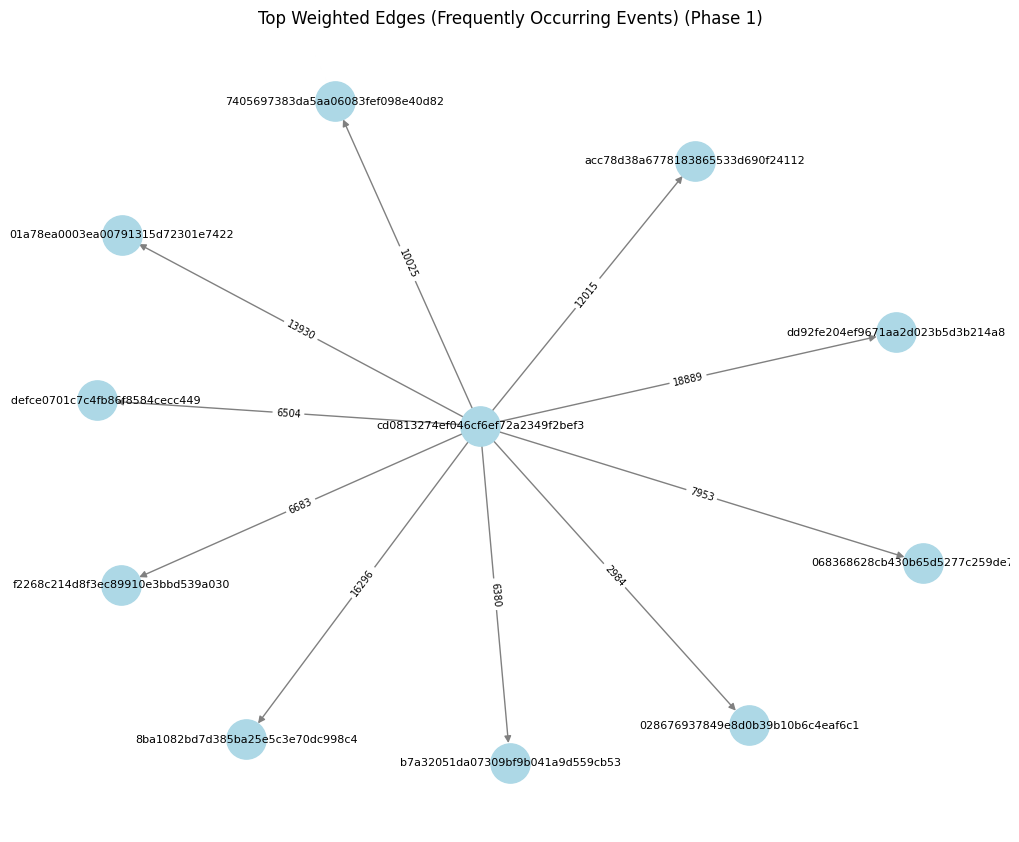

In [ ]:
H = nx.DiGraph()
for u, v, d in high_weight_edges:
    H.add_edge(u, v, weight=d['weight'], event_type=d['event_type'])

# Generate positions for the nodes
pos = nx.spring_layout(H, seed=42)

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(H, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=800, font_size=8)

# Add edge labels to show weights
edge_labels = nx.get_edge_attributes(H, "weight")
nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_size=7)

plt.title("Top Weighted Edges (Frequently Occurring Events) (Phase 1)")
plt.show()

In [220]:
event_types = [d['event_type'] for _, _, d in H.edges(data=True)]
from collections import Counter
event_type_counts = Counter(event_types)
print("Event type counts:", event_type_counts)

Event type counts: Counter({'Process': 10})


In [221]:
target_weights = {}
for _, target, d in H.edges(data=True):
    target_weights[target] = target_weights.get(target, 0) + d['weight']
sorted_targets = sorted(target_weights.items(), key=lambda x: x[1], reverse=True)
print("Top target nodes by weight:", sorted_targets[:5])

Top target nodes by weight: [('dd92fe204ef9671aa2d023b5d3b214a8', 18889), ('8ba1082bd7d385ba25e5c3e70dc998c4', 16296), ('01a78ea0003ea00791315d72301e7422', 13930), ('acc78d38a6778183865533d690f24112', 12015), ('7405697383da5aa06083fef098e40d82', 10025)]


In [222]:
betweenness = nx.betweenness_centrality(H)
print(f"Betweenness centrality of cd0813274ef046cf6ef72a2349f2bef3: {betweenness['cd0813274ef046cf6ef72a2349f2bef3']}")


Betweenness centrality of cd0813274ef046cf6ef72a2349f2bef3: 0.0


In [175]:
self_loop = df[(df['from'] == df['to']) & (df['from'] != '')]
self_loop


id            type  \
466     e01019f420254918d55bc7d5e376a427         Process   
467     e01019f420254918d55bc7d5e376a427  WasTriggeredBy   
468     e01019f420254918d55bc7d5e376a427  WasTriggeredBy   
719     7e4ff6f460f8a6c5d198b0be528d3a20  WasTriggeredBy   
1126    3c3bf95f2640b6aac655540006977a93         Process   
...                                  ...             ...   
221291  f10719197115a7105bbef32f52c08b9a  WasTriggeredBy   
221292  f10719197115a7105bbef32f52c08b9a  WasTriggeredBy   
222111  b0389d9d0e49de46153036c28ef72a6a  WasTriggeredBy   
222114  16b6d8d46dae78836a8d962538553119         Process   
222115  16b6d8d46dae78836a8d962538553119  WasTriggeredBy   

                                    from                                to  \
466     e01019f420254918d55bc7d5e376a427  e01019f420254918d55bc7d5e376a427   
467     e01019f420254918d55bc7d5e376a427  e01019f420254918d55bc7d5e376a427   
468     e01019f420254918d55bc7d5e376a427  e01019f420254918d55bc7d5e376a427   
719     7e4ff6f460f8a6c5d198b0be528d3a20  7e4ff6f460f8a6c5d198b0be528d3a20   
1126    3c3bf95f2640b6aac655540006977a93  3c3bf95f2640b6aac655540006977a93   
...                                  ...                               ...   
221291  f10719197115a7105bbef32f52c08b9a  f10719197115a7105bbef32f52c08b9a   
221292  f10719197115a7105bbef32f52c08b9a  f10719197115a7105bbef32f52c08b9a   
222111  3259ce88c9b11906944f73e725d2355f  3259ce88c9b11906944f73e725d2355f   
222114  16b6d8d46dae78836a8d962538553119  16b6d8d46dae78836a8d962538553119   
222115  16b6d8d46dae78836a8d962538553119  16b6d8d46dae78836a8d962538553119   

        uid egid                       exe  gid euid        name  ...  \
466     0.0  0.0            /usr/sbin/cron  0.0  0.0        cron  ...   
467                                                               ...   
468                                                               ...   
719                                                               ...   
1126    0.0  0.0  /usr/lib/systemd/systemd  4.0  0.0  (rneloops)  ...   
...     ...  ...                       ...  ...  ...         ...  ...   
221291                                                            ...   
221292                                                            ...   
222111                                                            ...   
222114  0.0  0.0             /usr/bin/sudo  0.0  0.0        sudo  ...   
222115                                                            ...   

       local address remote port protocol remote address local port tgid fd  \
466                                                                           
467                                                                           
468                                                                           
719                                                                           
1126                                                                          
...              ...         ...      ...            ...        ...  ... ..   
221291                                                                        
221292                                                                        
222111                                                                        
222114                                                                        
222115                                                                        

       mode label subLabel  
466             0        0  
467             0        0  
468             0        0  
719             0        0  
1126            0        0  
...     ...   ...      ...  
221291          0        0  
221292          0        0  
222111          0        0  
222114          0        0  
222115          0        0  

[986 rows x 35 columns]

In [31]:
self_loop['command line'].unique()

array([''], dtype=object)

In [30]:
self_loop['exe'].unique()

array(['/usr/sbin/cron', '', '/usr/lib/systemd/systemd',
       '/usr/lib/gdm3/gdm-session-worker', '/usr/bin/Xwayland',
       '/usr/lib/xorg/Xorg',
       '/snap/snapd/20290/usr/lib/snapd/snap-update-ns',
       '/usr/bin/ssh-agent', '/usr/bin/sudo', '/usr/sbin/logrotate'],
      dtype=object)

In [74]:
df['time'] = pd.to_datetime(df["time"], unit = 's')

In [78]:
df['time']

0                                  NaT
1                                  NaT
2        2023-11-27 20:50:10.496000000
3                                  NaT
4        2023-11-27 20:50:10.496000000
                      ...             
418850                             NaT
418851   2023-12-04 22:20:21.461999872
418852                             NaT
418853   2023-12-04 22:20:21.461999872
418854   2023-12-04 22:20:21.461999872
Name: time, Length: 418855, dtype: datetime64[ns]

In [182]:
df = pd.read_csv("Phase2_Provenance_Cleaned.csv")[0:]
df = df.fillna('')

G = nx.DiGraph()

for _, row in df.iterrows():
    source, target, event_type = row["from"], row["to"], row["type"]
    
    if G.has_edge(source, target):
        G[source][target]["weight"] += 1
    else:
        G.add_edge(source, target, weight=1, event_type = event_type)

#Frequently occurred events
high_weight_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:10]
print("Top weighted edges (Phase 2) (frequently occurring events):", high_weight_edges)

#rare/anomal events
rare_events = [(u, v, d) for u, v, d in G.edges(data=True) if d["event_type"] == "PrivilegeEscalation"]
print("Rare but significant events:", rare_events)

/var/folders/t8/_2vv47_s12d49vpmvrkng3c80000gn/T/ipykernel_22049/2640158041.py:1: DtypeWarning: Columns (24,27,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Phase2_Provenance_Cleaned.csv")[0:]


Top weighted edges (Phase 2) (frequently occurring events): [('cd0813274ef046cf6ef72a2349f2bef3', '38bdf9c568fae2703ceefbb1ef16907d', {'weight': 10406, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', '2ccf7c39e2110a8ace6edbb8b4de9343', {'weight': 8838, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', 'a2a436c59b4714145b4b590b87ccbb2c', {'weight': 7680, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', '57c6db9bf14bb52653afce721d8bc53b', {'weight': 6112, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', '732ddfacb72c0649ebf368e9571bcd9a', {'weight': 3241, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', 'e175de3426dc933eab0f5c495267f2b4', {'weight': 2907, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', 'e8e2a4974befcb8b3898b50cdf18e36f', {'weight': 2830, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', '304e8c23ffe33caba5c289e76ce14344', {'weight': 2544, 'event_type': 'Process'}), ('

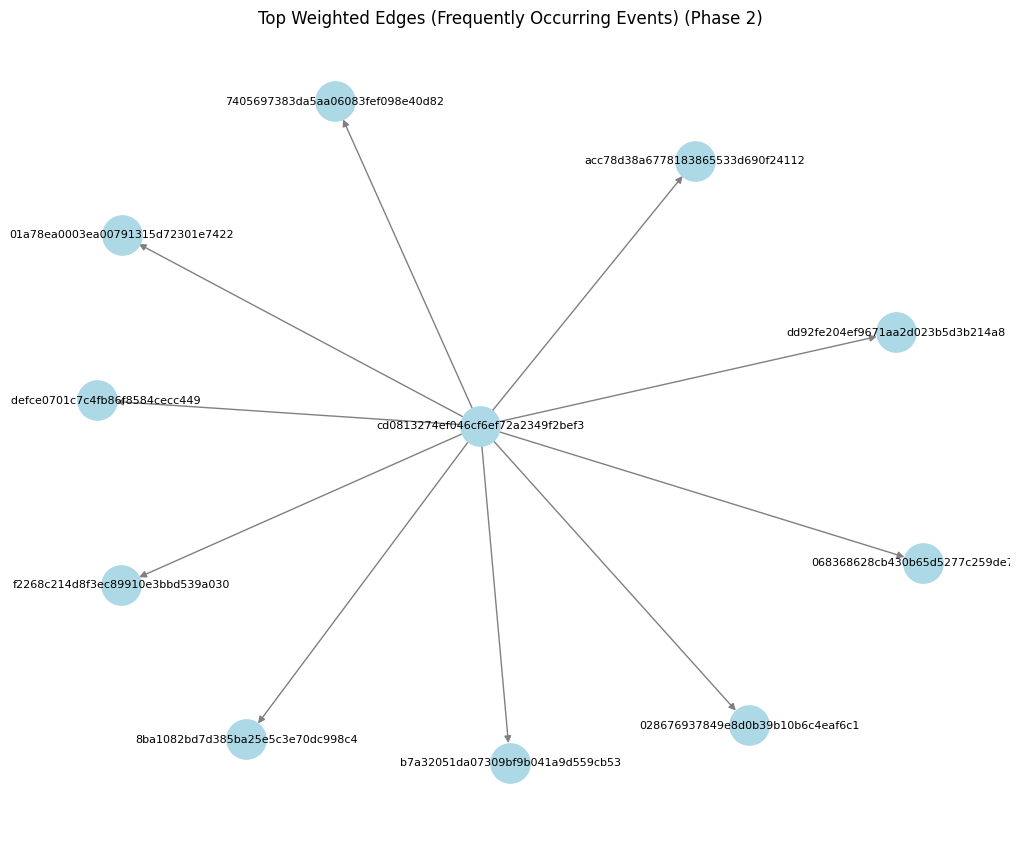

In [228]:
G = nx.DiGraph()
for u, v, d in high_weight_edges:
    H.add_edge(u, v, weight=d['weight'], event_type=d['event_type'])

# Generate positions for the nodes
pos = nx.spring_layout(H, seed=42)

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(H, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=800, font_size=8)

# Add edge labels to show weights
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

plt.title("Top Weighted Edges (Frequently Occurring Events) (Phase 2)")
plt.show()

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming G is your graph
# Add edges with both weight and type as attributes
for _, row in df.iterrows():
    source, target, event_type = row["from"], row["to"], row["type"]
    
    if G.has_edge(source, target):
        G[source][target]["weight"] += 1
    else:
        G.add_edge(source, target, weight=1, event_type=event_type)

# Generate positions for the nodes
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=800, font_size=8)

# Create edge labels that include both weight and type
edge_labels = {
    (u, v): f"{d['event_type']} ({d['weight']})"
    for u, v, d in G.edges(data=True)
}

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

plt.title("Provenance Graph with Edge Weights and Types")
plt.show()

KeyboardInterrupt: 

In [188]:
in_degree = G.in_degree('cd0813274ef046cf6ef72a2349f2bef3')
out_degree = G.out_degree('cd0813274ef046cf6ef72a2349f2bef3')
print(f"In-degree: {in_degree}, Out-degree: {out_degree}")

In-degree: 0, Out-degree: 85


In [189]:
# Get all outgoing edges from the node
outgoing_edges = G.out_edges('cd0813274ef046cf6ef72a2349f2bef3', data=True)

# Print the details of each outgoing edge
for source, target, attributes in outgoing_edges:
    print(f"Source: {source}, Target: {target}, Attributes: {attributes}")

Source: cd0813274ef046cf6ef72a2349f2bef3, Target: b6441fae5a5a024965680beb6d251f68, Attributes: {'weight': 6, 'event_type': 'Process'}
Source: cd0813274ef046cf6ef72a2349f2bef3, Target: 75d1418516143ca44cab643505326a9c, Attributes: {'weight': 4, 'event_type': 'Process'}
Source: cd0813274ef046cf6ef72a2349f2bef3, Target: 7c525651c4801d23b948d9cada3c8f4c, Attributes: {'weight': 10, 'event_type': 'Process'}
Source: cd0813274ef046cf6ef72a2349f2bef3, Target: d51c8a3250c7649344489f94e445d666, Attributes: {'weight': 28, 'event_type': 'Process'}
Source: cd0813274ef046cf6ef72a2349f2bef3, Target: bec99b854dce1b9da3042f825517036d, Attributes: {'weight': 48, 'event_type': 'Process'}
Source: cd0813274ef046cf6ef72a2349f2bef3, Target: b9baf460c7e79c56885b77d52e43e06c, Attributes: {'weight': 64, 'event_type': 'Process'}
Source: cd0813274ef046cf6ef72a2349f2bef3, Target: 304e8c23ffe33caba5c289e76ce14344, Attributes: {'weight': 5088, 'event_type': 'Process'}
Source: cd0813274ef046cf6ef72a2349f2bef3, Target

In [190]:
from collections import Counter

interaction_types = [attributes['event_type'] for _, _, attributes in outgoing_edges]
interaction_counts = Counter(interaction_types)
print("Interaction counts:", interaction_counts)

Interaction counts: Counter({'Process': 85})


In [191]:
used_edges = [(source, target, attributes) for source, target, attributes in outgoing_edges if attributes['event_type'] == 'Used']
print("Edges with 'Used' interaction:", used_edges)

Edges with 'Used' interaction: []


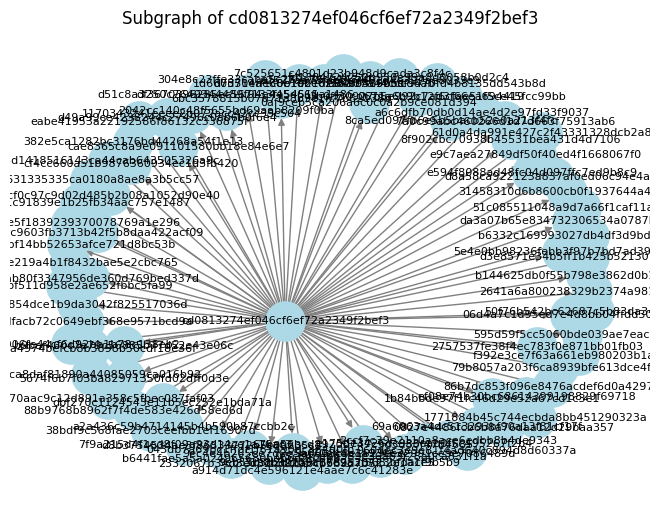

In [192]:
neighbors = list(G.successors('cd0813274ef046cf6ef72a2349f2bef3'))
subgraph = G.subgraph(neighbors + ['cd0813274ef046cf6ef72a2349f2bef3'])
nx.draw(subgraph, with_labels=True, node_color="lightblue", edge_color="gray", node_size=800, font_size=8)
plt.title("Subgraph of cd0813274ef046cf6ef72a2349f2bef3")
plt.show()

In [186]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming G is your graph
# Add edges with both weight and type as attributes
for _, row in df.iterrows():
    source, target, event_type = row["from"], row["to"], row["type"]
    
    if G.has_edge(source, target):
        G[source][target]["weight"] += 1
    else:
        G.add_edge(source, target, weight=1, event_type=event_type)

# Generate positions for the nodes
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(18, 12))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=800, font_size=8)

# Create edge labels that include both weight and type
edge_labels = {
    (u, v): f"{d['event_type']} ({d['weight']})"
    for u, v, d in G.edges(data=True)
}

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

plt.title("Provenance Graph with Edge Weights and Types")
plt.show()

KeyboardInterrupt: 

In [195]:
for _, target, attributes in outgoing_edges:
    print(f"Attributes: {attributes}")
    print(f"Interaction with {target} at time {attributes.get('time', 'N/A')}")

Attributes: {'weight': 6, 'event_type': 'Process'}
Interaction with b6441fae5a5a024965680beb6d251f68 at time N/A
Attributes: {'weight': 4, 'event_type': 'Process'}
Interaction with 75d1418516143ca44cab643505326a9c at time N/A
Attributes: {'weight': 10, 'event_type': 'Process'}
Interaction with 7c525651c4801d23b948d9cada3c8f4c at time N/A
Attributes: {'weight': 28, 'event_type': 'Process'}
Interaction with d51c8a3250c7649344489f94e445d666 at time N/A
Attributes: {'weight': 48, 'event_type': 'Process'}
Interaction with bec99b854dce1b9da3042f825517036d at time N/A
Attributes: {'weight': 64, 'event_type': 'Process'}
Interaction with b9baf460c7e79c56885b77d52e43e06c at time N/A
Attributes: {'weight': 5088, 'event_type': 'Process'}
Interaction with 304e8c23ffe33caba5c289e76ce14344 at time N/A
Attributes: {'weight': 614, 'event_type': 'Process'}
Interaction with 960dec3e9e81f4ad640c894d8d60337a at time N/A
Attributes: {'weight': 1576, 'event_type': 'Process'}
Interaction with 51c085511048a9d7

In [198]:
for target in G.successors('cd0813274ef046cf6ef72a2349f2bef3'):
    print(f"Target: {target}, Attributes: {G.nodes[target]}")

Target: b6441fae5a5a024965680beb6d251f68, Attributes: {}
Target: 75d1418516143ca44cab643505326a9c, Attributes: {}
Target: 7c525651c4801d23b948d9cada3c8f4c, Attributes: {}
Target: d51c8a3250c7649344489f94e445d666, Attributes: {}
Target: bec99b854dce1b9da3042f825517036d, Attributes: {}
Target: b9baf460c7e79c56885b77d52e43e06c, Attributes: {}
Target: 304e8c23ffe33caba5c289e76ce14344, Attributes: {}
Target: 960dec3e9e81f4ad640c894d8d60337a, Attributes: {}
Target: 51c085511048a9d7a66f1caf11a0d22c, Attributes: {}
Target: d7d51eae88e1abe625aa07a44cccd6ab, Attributes: {}
Target: 0af9ceb5ca206a6c0c0a2b9ce081d394, Attributes: {}
Target: 31458310d6b8600cb0f1937644a47b5f, Attributes: {}
Target: 1771884b45c744ecbda8bb451290323a, Attributes: {}
Target: 7f9a215d4f1ed8f09a93d14ce1a16ac3, Attributes: {}
Target: 1d6605704ff1c0b1021df387fb419b5d, Attributes: {}
Target: 5e4e0bb98236febb3f97b7bd7ad39cd9, Attributes: {}
Target: 1b84bbde97f1fc46d29e52a67cd1c3e1, Attributes: {}
Target: f392e3ce7f63a661eb98020

In [199]:
for _, target, attributes in outgoing_edges:
    print(f"Target: {target}, Event Type: {attributes.get('event_type')}, Weight: {attributes.get('weight')}")

Target: b6441fae5a5a024965680beb6d251f68, Event Type: Process, Weight: 6
Target: 75d1418516143ca44cab643505326a9c, Event Type: Process, Weight: 4
Target: 7c525651c4801d23b948d9cada3c8f4c, Event Type: Process, Weight: 10
Target: d51c8a3250c7649344489f94e445d666, Event Type: Process, Weight: 28
Target: bec99b854dce1b9da3042f825517036d, Event Type: Process, Weight: 48
Target: b9baf460c7e79c56885b77d52e43e06c, Event Type: Process, Weight: 64
Target: 304e8c23ffe33caba5c289e76ce14344, Event Type: Process, Weight: 5088
Target: 960dec3e9e81f4ad640c894d8d60337a, Event Type: Process, Weight: 614
Target: 51c085511048a9d7a66f1caf11a0d22c, Event Type: Process, Weight: 1576
Target: d7d51eae88e1abe625aa07a44cccd6ab, Event Type: Process, Weight: 516
Target: 0af9ceb5ca206a6c0c0a2b9ce081d394, Event Type: Process, Weight: 1904
Target: 31458310d6b8600cb0f1937644a47b5f, Event Type: Process, Weight: 1814
Target: 1771884b45c744ecbda8bb451290323a, Event Type: Process, Weight: 156
Target: 7f9a215d4f1ed8f09a93d

In [200]:
in_benign = G_benign.has_node('cd0813274ef046cf6ef72a2349f2bef3')
print(f"Exists in benign graph: {in_benign}")

Exists in benign graph: False


In [203]:
degrees = [G.out_degree(n) for n in G.nodes]
print(f"Out-degree of cd0813274ef046cf6ef72a2349f2bef3: {G.out_degree('cd0813274ef046cf6ef72a2349f2bef3')}")
print(f"Average out-degree: {sum(degrees) / len(degrees)}")

Out-degree of cd0813274ef046cf6ef72a2349f2bef3: 85
Average out-degree: 1.413973651615809


### Differences Between Both Phases

In [7]:
df_benign = pd.read_csv("Phase1_Provenance_Cleaned.csv")[0:40]
df_attack = pd.read_csv("Phase2_Provenance_Cleaned.csv", low_memory = False)[0:40]


G_benign = nx.DiGraph()
G_attack = nx.DiGraph()


def build_graph(df, G):
    for _, row in df.iterrows():
        src, tgt, event = row["from"], row["to"], row["type"]
        if G.has_edge(src, tgt):
            G[src][tgt]["weight"] += 1
        else:
            G.add_edge(src, tgt, weight=1, event_type=event)
    return G

# Build graphs for each phase
G_benign = build_graph(df_benign, G_benign)
G_attack = build_graph(df_attack, G_attack)

In [8]:
attack_only_edges = set(G_attack.edges()) - set(G_benign.edges())
attack_only_edges = list(attack_only_edges)

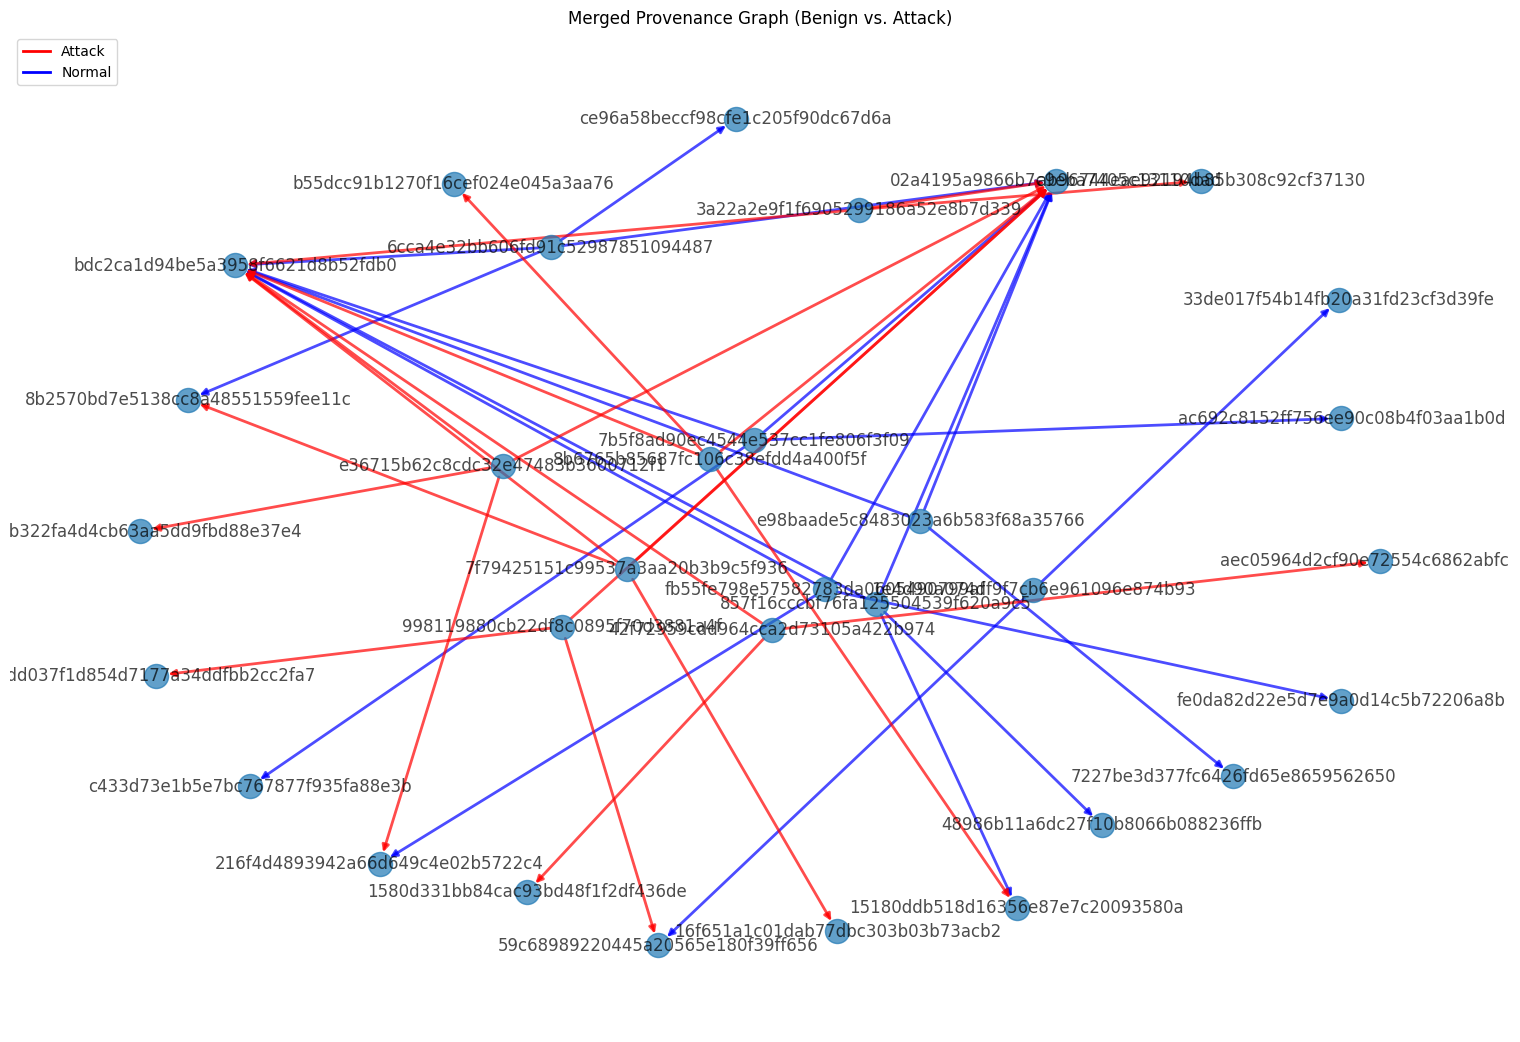

In [20]:
import matplotlib.pyplot as plt


G_combined = nx.DiGraph()


for G, label in [(G_benign, "benign"), (G_attack, "attack")]:
    for u, v, d in G.edges(data=True):
        if G_combined.has_edge(u, v):
            G_combined[u][v]["weight"] += d["weight"]
        else:
            G_combined.add_edge(u, v, weight=d["weight"], phase=label)


edge_colors = ["red" if G_combined[u][v]["phase"] == "attack" else "blue" for u, v in G_combined.edges()]




plt.figure(figsize=(15, 10))

pos = nx.spring_layout(G_combined, seed = 42)


nx.draw(G_combined, pos, with_labels=True, edge_color=edge_colors,width=2, alpha=0.7)

from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color="red", lw=2, label="Attack"),
    Line2D([0], [0], color="blue", lw=2, label="Normal"),
]

plt.title("Merged Provenance Graph (Benign vs. Attack)")
plt.legend(handles = legend_elements, loc="upper left")

plt.show()


### Timeline Graph

{('7b5f8ad90ec4544e537cc1fe806f3f09',
  'ac692c8152ff756ee90c08b4f03aa1b0d'): Text(0.3468106991772628, 0.19764704065374472, '2023-12-01 22:13:45.766999960'),
 ('7b5f8ad90ec4544e537cc1fe806f3f09',
  'c433d73e1b5e7bc767877f935fa88e3b'): Text(-0.4543047517932294, -0.25810542959484084, '2023-12-01 22:13:45.766999960'),
 ('7b5f8ad90ec4544e537cc1fe806f3f09',
  'bdc2ca1d94be5a3958f6621d8b52fdb0'): Text(-0.5799013226000775, 0.34088139761061087, '2023-12-01 22:13:45.766999960'),
 ('7b5f8ad90ec4544e537cc1fe806f3f09',
  '02a4195a9866b7c9eba7405c13110dad'): Text(0.04701888061824788, 0.5625946395659651, '2023-12-01 22:13:45.766999960'),
 ('fb55fe798e57582783da0605490799af',
  'fe0da82d22e5d7e9a0d14c5b72206a8b'): Text(0.40066321474323496, -0.5632062485151839, '2023-12-01 22:13:45.786999941')}

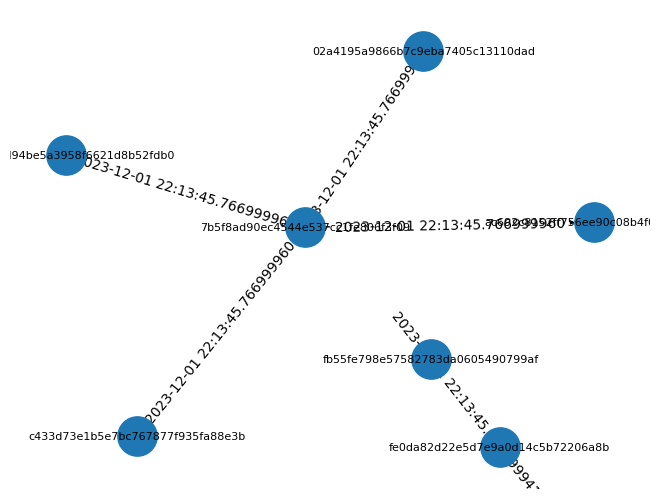

In [242]:
import networkx as nx

#see the sequence of events over time 
#conver to readable time first
#df_combined['time'] = pd.to_datetime(df['time'], unit='s')
df_time_sorted = df_combined.sort_values(by ="time")[0:5]

G = nx.DiGraph()
for  _, row in df_time_sorted.iterrows():
    G.add_edge(row['from'], row['to'], label = row['type'], time= row['time'])
    
pos = nx.spring_layout(G, seed = 42)
nx.draw(G, pos, with_labels = True, node_size = 800, font_size = 8)
edge_labels = nx.get_edge_attributes(G, "time")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    





In [191]:
df_combined['time']

0                                  NaT
1                                  NaT
2        2023-12-01 22:13:45.766999960
3                                  NaT
4        2023-12-01 22:13:45.766999960
                      ...             
418850                             NaT
418851                             NaT
418852                             NaT
418853                             NaT
418854                             NaT
Name: time, Length: 418855, dtype: datetime64[ns]

In [200]:
attack_only_edges = set(G_attack.edges()) - set(G_benign.edges())
attack_only_edges = list(attack_only_edges)
attack_only_edges

[('7f79425151c99537a3aa20b3b9c5f936', '16f651a1c01dab77dbc303b03b73acb2'),
 ('7f79425151c99537a3aa20b3b9c5f936', '02a4195a9866b7c9eba7405c13110dad'),
 ('8b6765b85687fc106c38efdd4a400f5f', '15180ddb518d16356e87e7c20093580a'),
 ('7f79425151c99537a3aa20b3b9c5f936', '8b2570bd7e5138cc8a48551559fee11c'),
 ('8b6765b85687fc106c38efdd4a400f5f', 'bdc2ca1d94be5a3958f6621d8b52fdb0'),
 ('3a22a2e9f1f6905299186a52e8b7d339', 'ab96744eae92194b85b308c92cf37130'),
 ('e36715b62c8cdc32e47483b3600712f1', 'bdc2ca1d94be5a3958f6621d8b52fdb0'),
 ('998119880cb22df8c0895f70d3881a4f', '4dd037f1d854d7177a34ddfbb2cc2fa7'),
 ('3a22a2e9f1f6905299186a52e8b7d339', 'bdc2ca1d94be5a3958f6621d8b52fdb0'),
 ('e36715b62c8cdc32e47483b3600712f1', '216f4d4893942a66d649c4e02b5722c4'),
 ('e36715b62c8cdc32e47483b3600712f1', 'ca5b322fa4d4cb63aa5dd9fbd88e37e4'),
 ('7f79425151c99537a3aa20b3b9c5f936', 'bdc2ca1d94be5a3958f6621d8b52fdb0'),
 ('8b6765b85687fc106c38efdd4a400f5f', '02a4195a9866b7c9eba7405c13110dad'),
 ('e36715b62c8cdc32e47483

### Attack anomalies

In [282]:
df_benign = pd.read_csv("Phase1_Provenance_Cleaned.csv")[0:50]
df_attack = pd.read_csv("Phase2_Provenance_Cleaned.csv", low_memory = False)[0:50]


G_benign = nx.DiGraph()
G_attack = nx.DiGraph()


def build_graph(df, G):
    for _, row in df.iterrows():
        src, tgt, event = row["from"], row["to"], row["type"]
        if G.has_edge(src, tgt):
            G[src][tgt]["weight"] += 1
        else:
            G.add_edge(src, tgt, weight=1, event_type=event)
    return G

# Build graphs for each phase
G_benign = build_graph(df_benign, G_benign)
G_attack = build_graph(df_attack, G_attack)

In [283]:
# Attack only edge
attack_only_edges = set(G_attack.edges()) - set(G_benign.edges())
attack_only_edges = list(attack_only_edges)

#attack only rows
attack_only_rows = df[df.apply(lambda row  : (row['from'], row['to']) in attack_only_edges, axis = 1)]

attack_only_rows



id            type  \
0   ca5b322fa4d4cb63aa5dd9fbd88e37e4         Process   
1   e36715b62c8cdc32e47483b3600712f1         Process   
2   e36715b62c8cdc32e47483b3600712f1  WasTriggeredBy   
3   216f4d4893942a66d649c4e02b5722c4        Artifact   
4   216f4d4893942a66d649c4e02b5722c4            Used   
5   bdc2ca1d94be5a3958f6621d8b52fdb0        Artifact   
6   bdc2ca1d94be5a3958f6621d8b52fdb0            Used   
7   02a4195a9866b7c9eba7405c13110dad        Artifact   
8   02a4195a9866b7c9eba7405c13110dad            Used   
9   b55dcc91b1270f16cef024e045a3aa76         Process   
10  8b6765b85687fc106c38efdd4a400f5f         Process   
11  8b6765b85687fc106c38efdd4a400f5f  WasTriggeredBy   
12  15180ddb518d16356e87e7c20093580a        Artifact   
13  15180ddb518d16356e87e7c20093580a            Used   
14  15180ddb518d16356e87e7c20093580a            Used   
15  15180ddb518d16356e87e7c20093580a            Used   
16  16f651a1c01dab77dbc303b03b73acb2         Process   
17  7f79425151c99537a3aa20b3b9c5f936         Process   
18  7f79425151c99537a3aa20b3b9c5f936  WasTriggeredBy   
19  8b2570bd7e5138cc8a48551559fee11c        Artifact   
20  8b2570bd7e5138cc8a48551559fee11c            Used   
21  8b2570bd7e5138cc8a48551559fee11c            Used   
22  8b2570bd7e5138cc8a48551559fee11c            Used   
23  ab96744eae92194b85b308c92cf37130         Process   
24  3a22a2e9f1f6905299186a52e8b7d339         Process   
25  3a22a2e9f1f6905299186a52e8b7d339  WasTriggeredBy   
26  3a22a2e9f1f6905299186a52e8b7d339            Used   
27  3a22a2e9f1f6905299186a52e8b7d339            Used   
28  4dd037f1d854d7177a34ddfbb2cc2fa7         Process   
29  998119880cb22df8c0895f70d3881a4f         Process   
30  998119880cb22df8c0895f70d3881a4f  WasTriggeredBy   
31  59c68989220445a20565e180f39ff656        Artifact   
32  59c68989220445a20565e180f39ff656            Used   
33  59c68989220445a20565e180f39ff656            Used   
34  1580d331bb84cac93bd48f1f2df436de         Process   
35  42f72959cdd964cca2d73105a422b974         Process   
36  42f72959cdd964cca2d73105a422b974  WasTriggeredBy   
37  aec05964d2cf90e72554c6862abfc1bd        Artifact   
38  aec05964d2cf90e72554c6862abfc1bd            Used   
39  aec05964d2cf90e72554c6862abfc1bd            Used   
40  aec05964d2cf90e72554c6862abfc1bd            Used   
41  a6c202f48cd1aa9690275aaaad15cdad         Process   
42  ceb0e71ab1688d31dd8e2c1f08734f5a         Process   
43  ceb0e71ab1688d31dd8e2c1f08734f5a  WasTriggeredBy   
44  c433d73e1b5e7bc767877f935fa88e3b        Artifact   
45  c433d73e1b5e7bc767877f935fa88e3b            Used   
46  c433d73e1b5e7bc767877f935fa88e3b            Used   
47  c433d73e1b5e7bc767877f935fa88e3b            Used   
48  967fb520af5b1eab0ef360b30df3bce6         Process   
49  5eb47398c9540bb438287336d847f0e8         Process   
50  5eb47398c9540bb438287336d847f0e8  WasTriggeredBy   

                                from                                to  uid  \
0   e36715b62c8cdc32e47483b3600712f1  ca5b322fa4d4cb63aa5dd9fbd88e37e4  0.0   
1   e36715b62c8cdc32e47483b3600712f1  ca5b322fa4d4cb63aa5dd9fbd88e37e4  0.0   
2   e36715b62c8cdc32e47483b3600712f1  ca5b322fa4d4cb63aa5dd9fbd88e37e4  NaN   
3   e36715b62c8cdc32e47483b3600712f1  216f4d4893942a66d649c4e02b5722c4  NaN   
4   e36715b62c8cdc32e47483b3600712f1  216f4d4893942a66d649c4e02b5722c4  NaN   
5   e36715b62c8cdc32e47483b3600712f1  bdc2ca1d94be5a3958f6621d8b52fdb0  NaN   
6   e36715b62c8cdc32e47483b3600712f1  bdc2ca1d94be5a3958f6621d8b52fdb0  NaN   
7   e36715b62c8cdc32e47483b3600712f1  02a4195a9866b7c9eba7405c13110dad  NaN   
8   e36715b62c8cdc32e47483b3600712f1  02a4195a9866b7c9eba7405c13110dad  NaN   
9   8b6765b85687fc106c38efdd4a400f5f  b55dcc91b1270f16cef024e045a3aa76  0.0   
10  8b6765b85687fc106c38efdd4a400f5f  b55dcc91b1270f16cef024e045a3aa76  0.0   
11  8b6765b85687fc106c38efdd4a400f5f  b55dcc91b1270f16cef024e045a3aa76  NaN   
12  8b6765b85687fc106c38efdd4a400f5f  15180ddb518d16356e87e7c20093580a  NaN   
13  8b6765b8568

In [284]:
#Event type for Attack only Edges:

attack_event_type_counts = attack_only_rows['type'].value_counts()

print("Event type counts for attack-only edges:")
print(attack_event_type_counts)

Event type counts for attack-only edges:
type
Used              19
Process           16
WasTriggeredBy     8
Artifact           8
Name: count, dtype: int64


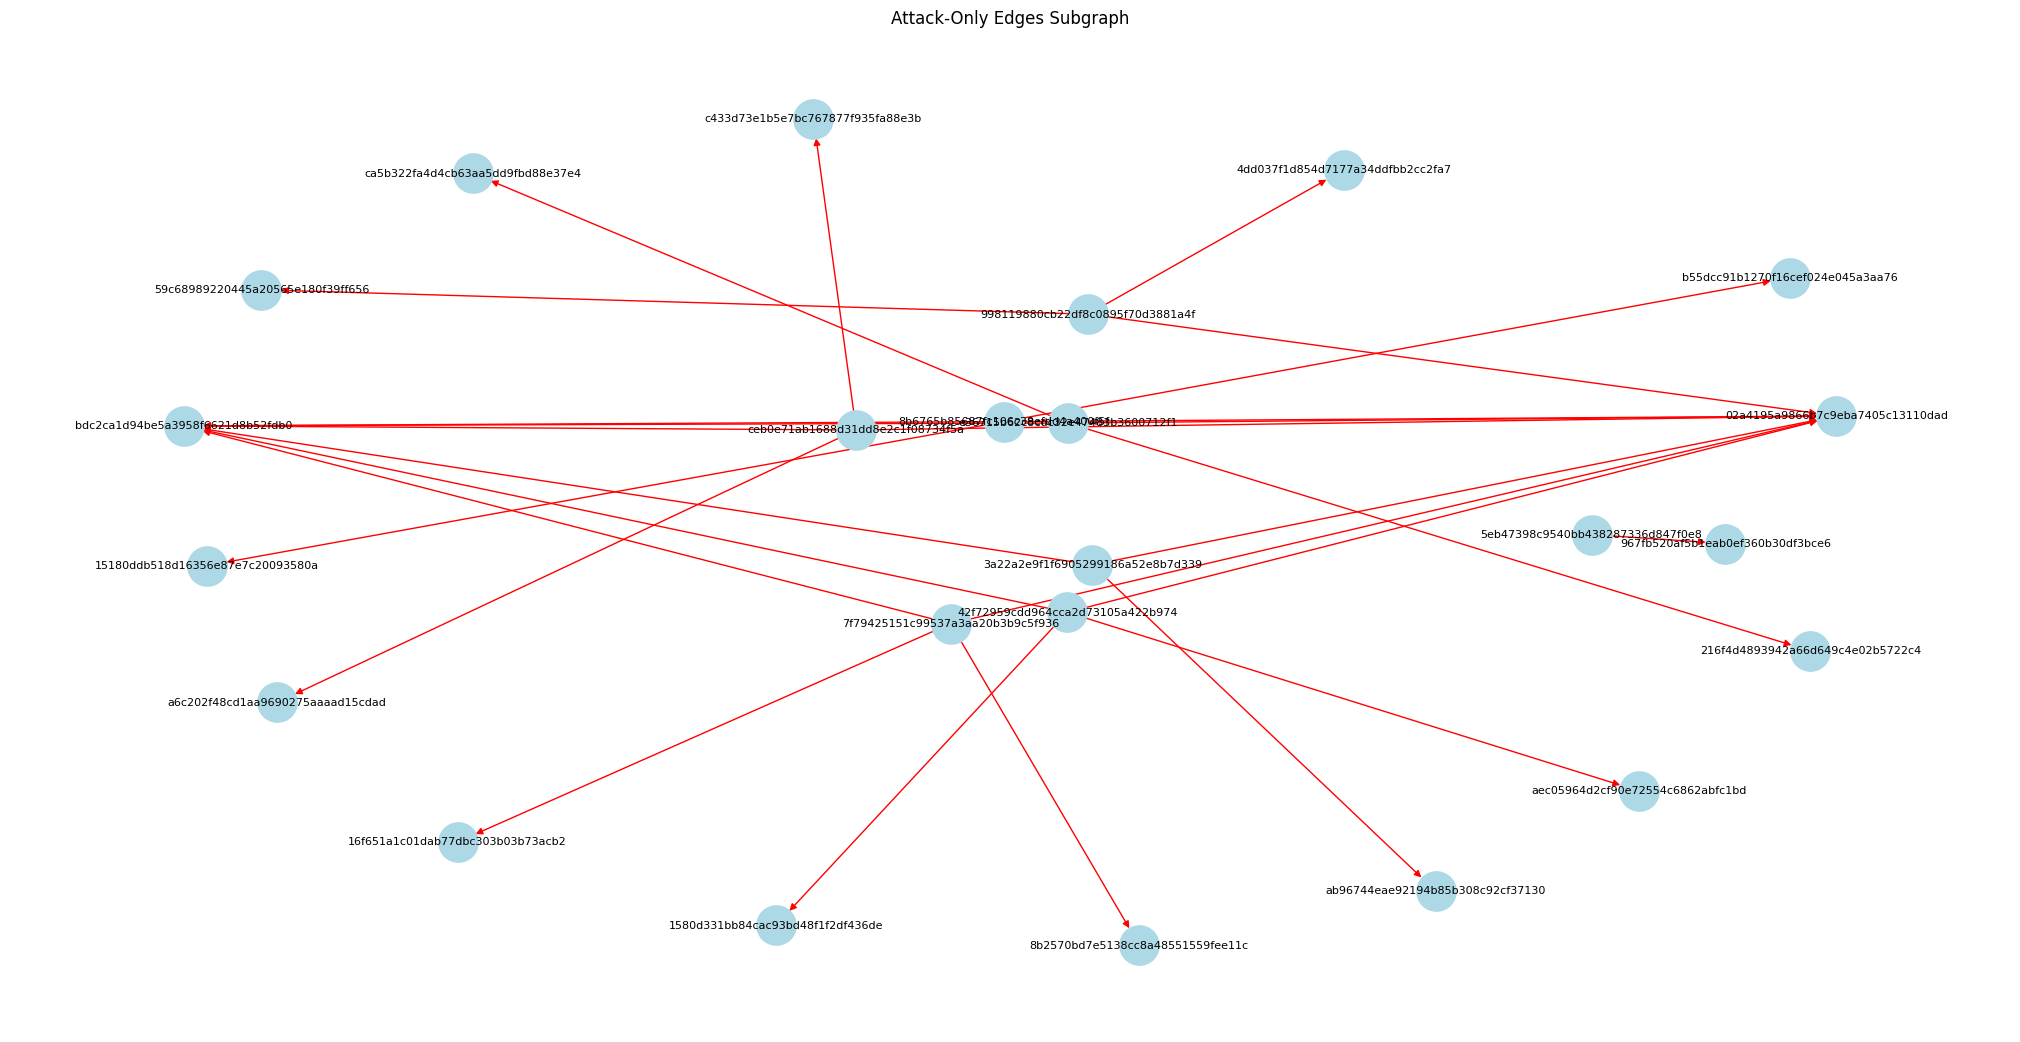

In [285]:
#visualzing the attak-only edges:

G_attack = nx.DiGraph()
G_attack.add_edges_from(attack_only_edges)

pos = nx.spring_layout(G_attack, seed=42)
plt.figure(figsize=(20, 10))
nx.draw(G_attack, pos, with_labels=True, node_color="lightblue", edge_color="red", node_size=800, font_size=8)
plt.title("Attack-Only Edges Subgraph")
plt.show()

In [240]:
df_attack[df_attack['id'] == '02a4195a9866b7c9eba7405c13110dad'] # Critical target for resources

id      type  \
7  02a4195a9866b7c9eba7405c13110dad  Artifact   
8  02a4195a9866b7c9eba7405c13110dad      Used   

                               from                                to  uid  \
7  e36715b62c8cdc32e47483b3600712f1  02a4195a9866b7c9eba7405c13110dad  NaN   
8  e36715b62c8cdc32e47483b3600712f1  02a4195a9866b7c9eba7405c13110dad  NaN   

   egid  exe  gid  euid name  ...  local address  remote port protocol  \
7   NaN  NaN  NaN   NaN  NaN  ...            NaN          NaN      NaN   
8   NaN  NaN  NaN   NaN  NaN  ...            NaN          NaN      NaN   

   remote address local port  tgid  fd  mode label subLabel  
7             NaN        NaN   NaN NaN   NaN     0        0  
8             NaN        NaN   NaN NaN   NaN     0        0  

[2 rows x 35 columns]

In [238]:
attack_only_edges

[('7f79425151c99537a3aa20b3b9c5f936', '02a4195a9866b7c9eba7405c13110dad'),
 ('e36715b62c8cdc32e47483b3600712f1', 'bdc2ca1d94be5a3958f6621d8b52fdb0'),
 ('3a22a2e9f1f6905299186a52e8b7d339', 'bdc2ca1d94be5a3958f6621d8b52fdb0'),
 ('e36715b62c8cdc32e47483b3600712f1', 'ca5b322fa4d4cb63aa5dd9fbd88e37e4'),
 ('e36715b62c8cdc32e47483b3600712f1', '02a4195a9866b7c9eba7405c13110dad'),
 ('42f72959cdd964cca2d73105a422b974', 'bdc2ca1d94be5a3958f6621d8b52fdb0'),
 ('3a22a2e9f1f6905299186a52e8b7d339', '02a4195a9866b7c9eba7405c13110dad'),
 ('7f79425151c99537a3aa20b3b9c5f936', '16f651a1c01dab77dbc303b03b73acb2'),
 ('998119880cb22df8c0895f70d3881a4f', '02a4195a9866b7c9eba7405c13110dad'),
 ('3a22a2e9f1f6905299186a52e8b7d339', 'ab96744eae92194b85b308c92cf37130'),
 ('8b6765b85687fc106c38efdd4a400f5f', 'bdc2ca1d94be5a3958f6621d8b52fdb0'),
 ('998119880cb22df8c0895f70d3881a4f', '4dd037f1d854d7177a34ddfbb2cc2fa7'),
 ('8b6765b85687fc106c38efdd4a400f5f', '02a4195a9866b7c9eba7405c13110dad'),
 ('8b6765b85687fc106c38ef

In [239]:
#bdc2ca1d94be5a3958f6621d8b52fdb0
df_attack[df_attack['id'] == 'bdc2ca1d94be5a3958f6621d8b52fdb0']

id      type  \
5  bdc2ca1d94be5a3958f6621d8b52fdb0  Artifact   
6  bdc2ca1d94be5a3958f6621d8b52fdb0      Used   

                               from                                to  uid  \
5  e36715b62c8cdc32e47483b3600712f1  bdc2ca1d94be5a3958f6621d8b52fdb0  NaN   
6  e36715b62c8cdc32e47483b3600712f1  bdc2ca1d94be5a3958f6621d8b52fdb0  NaN   

   egid  exe  gid  euid name  ...  local address  remote port protocol  \
5   NaN  NaN  NaN   NaN  NaN  ...            NaN          NaN      NaN   
6   NaN  NaN  NaN   NaN  NaN  ...            NaN          NaN      NaN   

   remote address local port  tgid  fd  mode label subLabel  
5             NaN        NaN   NaN NaN   NaN     0        0  
6             NaN        NaN   NaN NaN   NaN     0        0  

[2 rows x 35 columns]

### Event-Type-Based Subgraph

{('e36715b62c8cdc32e47483b3600712f1',
  'ca5b322fa4d4cb63aa5dd9fbd88e37e4'): Text(0.7188645955406985, 0.3368499193070209, 'WasTriggeredBy'),
 ('8b6765b85687fc106c38efdd4a400f5f',
  'b55dcc91b1270f16cef024e045a3aa76'): Text(-0.8693882515745874, 0.3768784881462186, 'WasTriggeredBy'),
 ('7f79425151c99537a3aa20b3b9c5f936',
  '16f651a1c01dab77dbc303b03b73acb2'): Text(-0.6208475608251316, 0.7361744028992816, 'WasTriggeredBy'),
 ('3a22a2e9f1f6905299186a52e8b7d339',
  'ab96744eae92194b85b308c92cf37130'): Text(-0.7450883898064259, -0.49659990118552666, 'WasTriggeredBy'),
 ('998119880cb22df8c0895f70d3881a4f',
  '4dd037f1d854d7177a34ddfbb2cc2fa7'): Text(-0.4717150414948368, -0.714342973304862, 'WasTriggeredBy'),
 ('42f72959cdd964cca2d73105a422b974',
  '1580d331bb84cac93bd48f1f2df436de'): Text(-0.8277587060335929, -0.32885688617800723, 'WasTriggeredBy'),
 ('ceb0e71ab1688d31dd8e2c1f08734f5a',
  'a6c202f48cd1aa9690275aaaad15cdad'): Text(-0.9101924976381375, 0.08768193951605818, 'WasTriggeredBy'),
 (

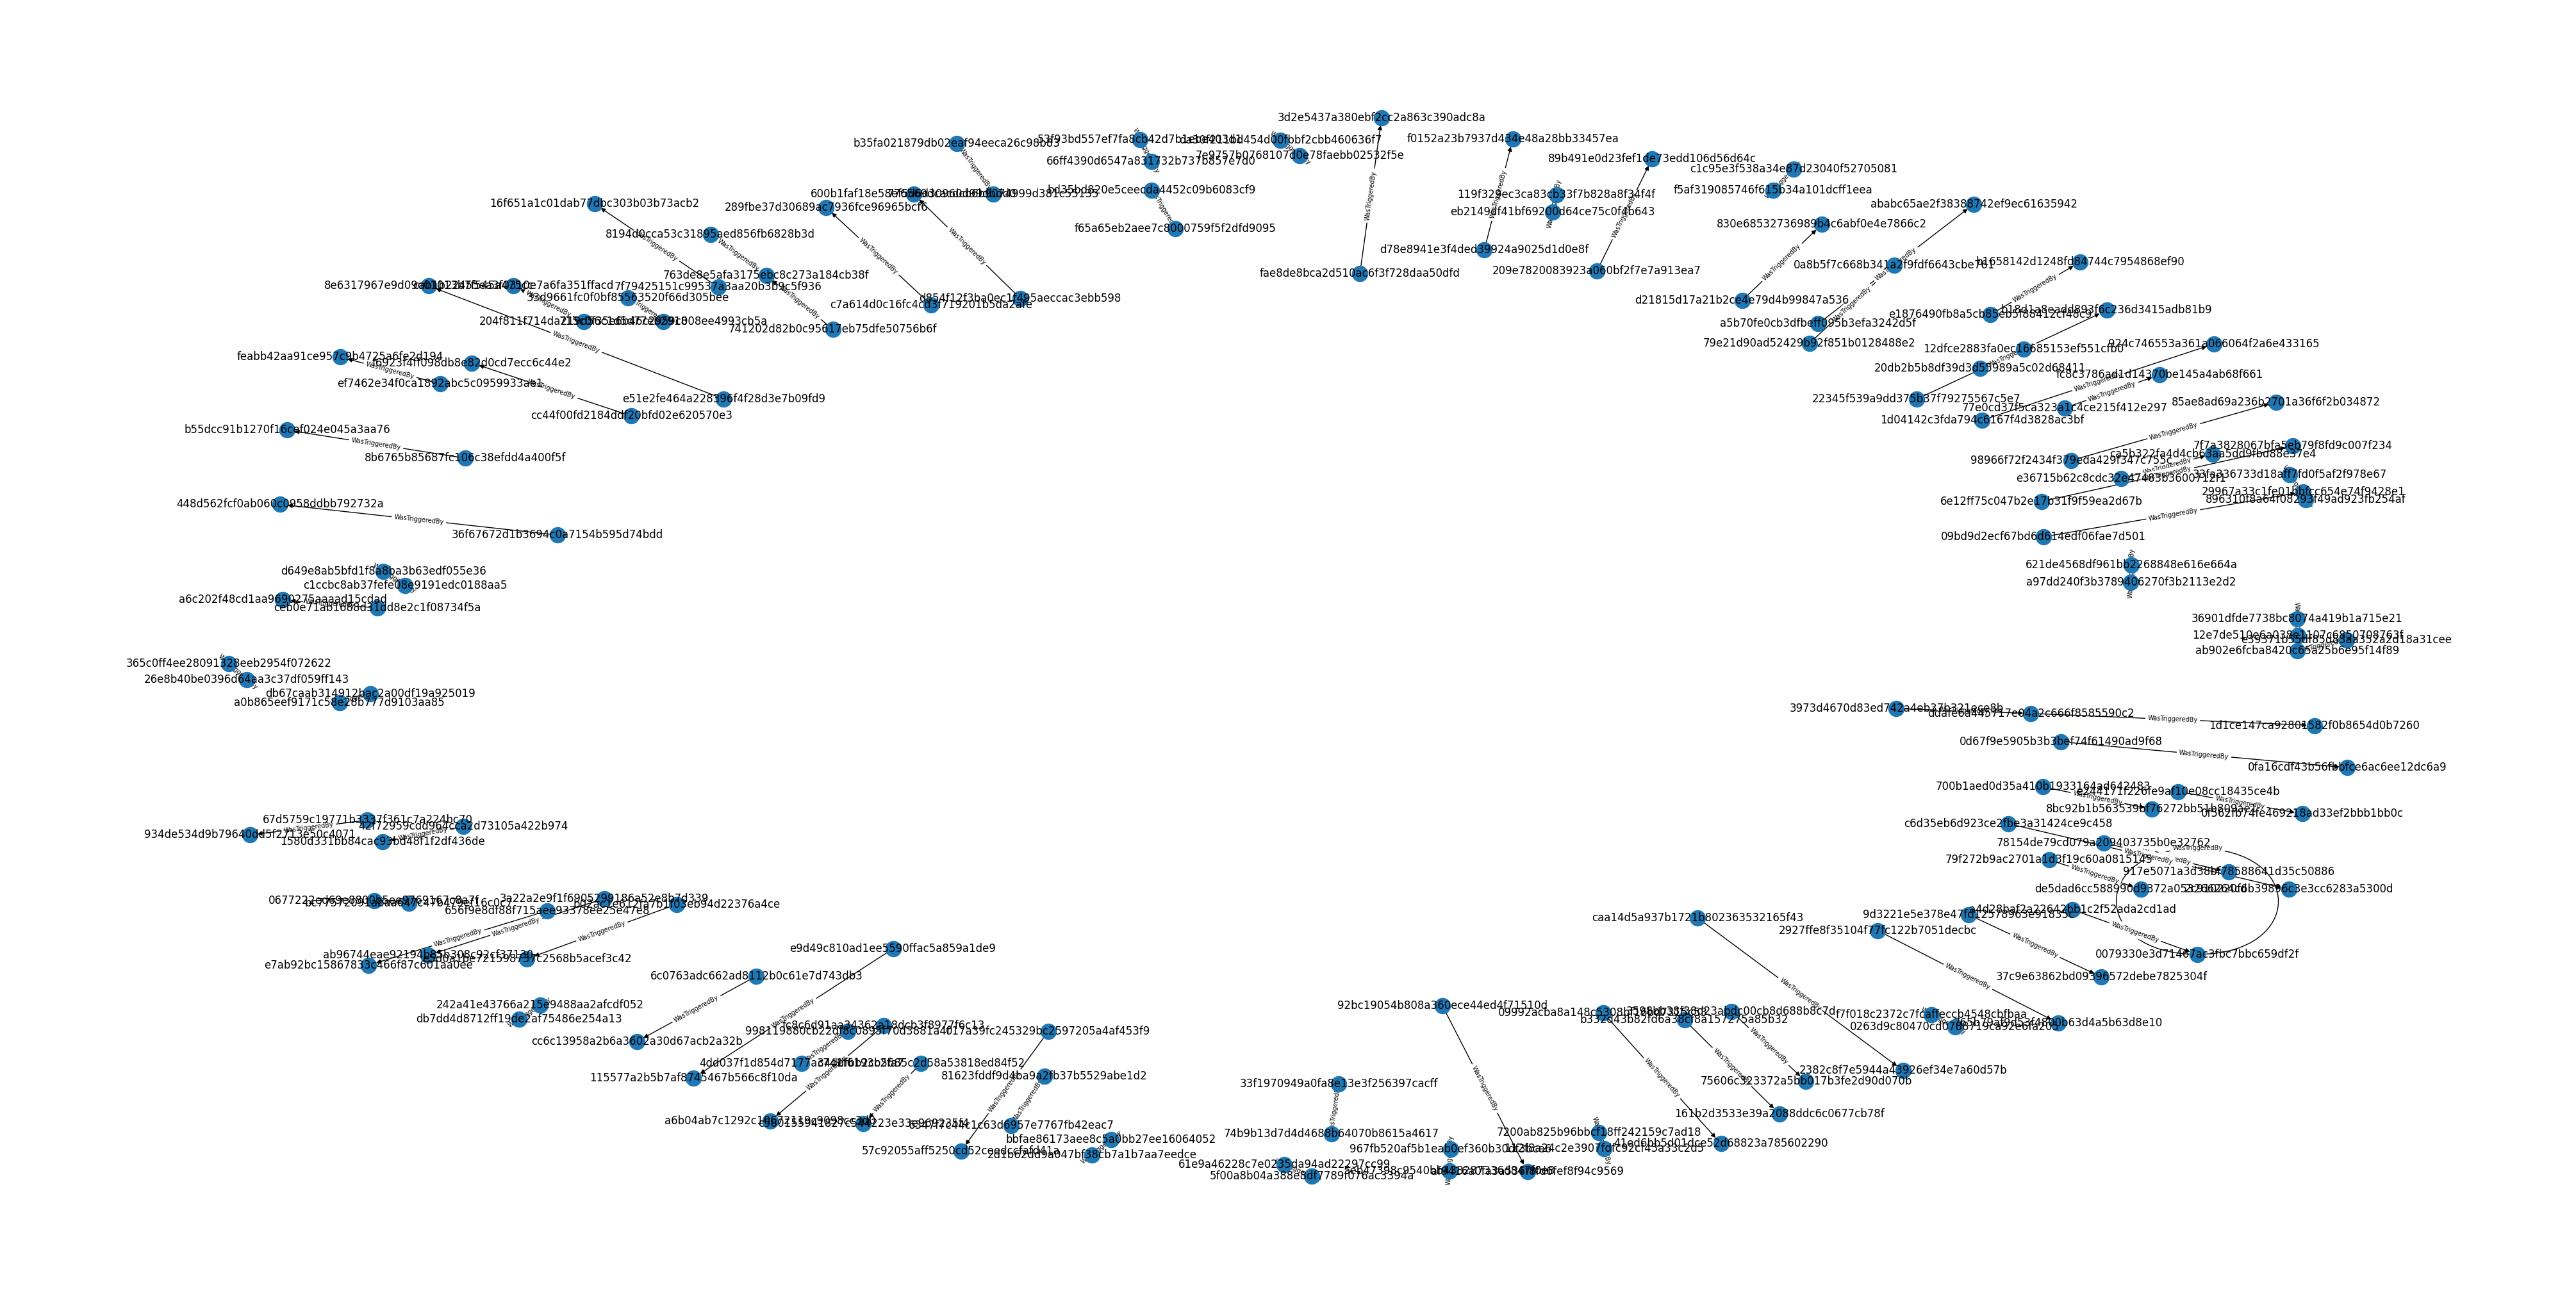

In [276]:
event  = 'WasTriggeredBy'

df = pd.read_csv('Phase2_Provenance_Cleaned.csv', low_memory= False)[0:500]
G = nx.DiGraph()

plt.figure(figsize=(40, 20))


for _, row in df.iterrows():
    G.add_edge(row["from"], row["to"], label=row["type"]) 

H  = nx.DiGraph()
for u, v, d in G.edges(data = True):
    if d['label'] == event:
        H.add_edge(u, v , label=d["label"])
        


    
pos = nx.spring_layout(H, seed = 42)

nx.draw(H, pos, with_labels=True, node_size = 300)
edge_labels = nx.get_edge_attributes(H, "label")


nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_size=7)

In [ ]:
df_combined['type'].unique()

array(['Process', 'WasTriggeredBy', 'Artifact', 'Used', 'WasGeneratedBy',
       'WasDerivedFrom'], dtype=object)

In [14]:
df_attack[df_combined['type'] == 'Process']

/var/folders/t8/_2vv47_s12d49vpmvrkng3c80000gn/T/ipykernel_22049/1489465456.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_attack[df_combined['type'] == 'Process']


id            type  \
0       ca5b322fa4d4cb63aa5dd9fbd88e37e4         Process   
1       e36715b62c8cdc32e47483b3600712f1         Process   
9       b55dcc91b1270f16cef024e045a3aa76         Process   
10      8b6765b85687fc106c38efdd4a400f5f         Process   
16      16f651a1c01dab77dbc303b03b73acb2         Process   
...                                  ...             ...   
196062  bf8b8e16a75c71423bd1f7d7d8159e63  WasGeneratedBy   
196352  b033d749266ee704f0d0629c50b2f457        Artifact   
196353  b033d749266ee704f0d0629c50b2f457  WasGeneratedBy   
196357  b1d957e95979c4b589ea479028ccbaaa  WasGeneratedBy   
196358  5f49d7d0c8584237a0f769527be8e1df        Artifact   

                                    from                                to  \
0       e36715b62c8cdc32e47483b3600712f1  ca5b322fa4d4cb63aa5dd9fbd88e37e4   
1       e36715b62c8cdc32e47483b3600712f1  ca5b322fa4d4cb63aa5dd9fbd88e37e4   
9       8b6765b85687fc106c38efdd4a400f5f  b55dcc91b1270f16cef024e045a3aa76   
10      8b6765b85687fc106c38efdd4a400f5f  b55dcc91b1270f16cef024e045a3aa76   
16      7f79425151c99537a3aa20b3b9c5f936  16f651a1c01dab77dbc303b03b73acb2   
...                                  ...                               ...   
196062  cd0813274ef046cf6ef72a2349f2bef3  2ccf7c39e2110a8ace6edbb8b4de9343   
196352  b033d749266ee704f0d0629c50b2f457  cc44f00fd2184ddf20bfd02e620570e3   
196353  b033d749266ee704f0d0629c50b2f457  cc44f00fd2184ddf20bfd02e620570e3   
196357  b1d957e95979c4b589ea479028ccbaaa  cc44f00fd2184ddf20bfd02e620570e3   
196358  5f49d7d0c8584237a0f769527be8e1df  cc44f00fd2184ddf20bfd02e620570e3   

        uid  egid            exe  gid  euid           name  ...  \
0       0.0   0.0  /usr/bin/dash  0.0   0.0        ethtool  ...   
1       0.0   0.0  /usr/bin/dash  0.0   0.0        ethtool  ...   
9       0.0   0.0  /usr/bin/dash  0.0   0.0        openvpn  ...   
10      0.0   0.0  /usr/bin/dash  0.0   0.0        openvpn  ...   
16      0.0   0.0  /usr/bin/dash  0.0   0.0  wpasupplicant  ...   
...     ...   ...            ...  ...   ...            ...  ...   
196062  NaN   NaN            NaN  NaN   NaN            NaN  ...   
196352  NaN   NaN            NaN  NaN   NaN            NaN  ...   
196353  NaN   NaN            NaN  NaN   NaN            NaN  ...   
196357  NaN   NaN            NaN  NaN   NaN            NaN  ...   
196358  NaN   NaN            NaN  NaN   NaN            NaN  ...   

        local address  remote port protocol  remote address local port  tgid  \
0                 NaN          NaN      NaN             NaN        NaN   NaN   
1                 NaN          NaN      NaN             NaN        NaN   NaN   
9                 NaN          NaN      NaN             NaN        NaN   NaN   
10                NaN          NaN      NaN             NaN        NaN   NaN   
16                NaN          NaN      NaN             NaN        NaN   NaN   
...               ...          ...      ...             ...        ...   ...   
196062            NaN          NaN      NaN             NaN        NaN   NaN   
196352            NaN         80.0      tcp    91.189.91.48        NaN   NaN   
196353            NaN          NaN      NaN             NaN        NaN   NaN   
196357            NaN          NaN      NaN             NaN        NaN   NaN   
196358            NaN         80.0      tcp    91.189.91.49        NaN   NaN   

        fd  mode label subLabel  
0      NaN   NaN     0        0  
1      NaN   NaN     0        0  
9      NaN   NaN     0        0  
10     NaN   NaN     0        0  
16     NaN   NaN     0        0  
...     ..   ...   ...      ...  
196062 NaN   NaN     0        0  
196352 NaN   NaN     0        0  
196353 NaN   NaN     0        0  
196357 NaN   NaN     0        0  
196358 NaN   NaN     0        0  

[8999 rows x 35 columns]

In [16]:
df_attack['name'].unique()

array(['ethtool', nan, 'openvpn', 'wpasupplicant', 'sh', 'run-parts',
       'avahi-autoipd', 'bind9', 'rndc', 'sed', 'systemd-update-', 'grep',
       'sd-resolve', 'systemd-detect-', 'lsb_release', 'apparmor_parser',
       'accounts-daemon', 'acpid', 'anacron', 'apport', 'avahi-daemon',
       'cron', 'cupsd', 'dbus-daemon', 'systemctl', 'gpu-manager',
       'mkdir', 'startup.sh', 'uname', 'networkd-dispat', 'catalina.sh',
       'NetworkManager', 'polkitd', '0000usepeerdns', 'readlink',
       'irqbalance', 'snapd', 'udisksd', 'wpa_supplicant',
       'switcheroo-cont', 'grub-editenv', 'language-valida',
       'language-option', 'plymouth', 'chmod', 'ls', 'egrep',
       'e2scrub_all', 'nm-online', 'cups-browsed', 'locale', 'named',
       'true', 'sshd', 'snap-device-hel', 'ModemManager',
       'systemd-user-se', 'dmidecode', 'systemd-logind',
       'generate-config', 'pkill', 'alsactl', 'setvtrgb',
       'gdm-wait-for-dr', 'gdm3', 'cached_setup_te', 'unattended-upgr',
      

### Process Name Distribution

In [97]:
unique_process = df_attack[df_attack['type']  == 'Process']['name'].unique()

final_dict = {}
for i in df_attack['name']:
   for j in unique_process:
       if i == j:
           count = df_attack[df_attack['name'] == i]['name'].count()
           final_dict[i] = count
           
      

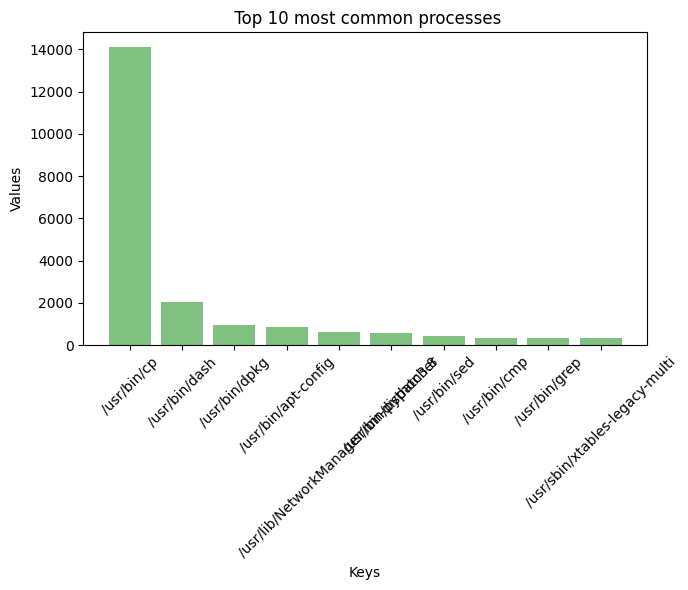

In [ ]:
top_10 = dict(sorted(final_dict.items(), key=lambda item: item[1], reverse=True)[:10])

plt.figure(figsize=(7, 6))
plt.bar(top_10.keys(), top_10.values(), color='green', alpha=0.5)
plt.xlabel("Keys")
plt.ylabel("Values")
plt.title(" Top 10 most common processes")
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

### Processs exe Distribution

In [125]:
unique_process = df_attack[df_attack['type']  == 'Process']['exe'].unique()[0:10]

final_dict = {}
for i in df_attack['exe']:
   for j in unique_process:
       if i == j:
           count = df_attack[df_attack['exe'] == i]['exe'].count()
           final_dict[i] = count

In [126]:
final_dict

{'/usr/bin/dash': np.int64(2026),
 '/usr/bin/run-parts': np.int64(122),
 '/usr/sbin/rndc': np.int64(78),
 '/usr/bin/sed': np.int64(456),
 '/usr/lib/systemd/systemd-update-utmp': np.int64(4),
 '/usr/bin/grep': np.int64(331),
 '/usr/lib/systemd/systemd-timesyncd': np.int64(1),
 '/usr/bin/systemd-detect-virt': np.int64(44),
 '/usr/bin/python3.8': np.int64(600),
 '/snap/snapd/20290/usr/lib/snapd/apparmor_parser': np.int64(18)}

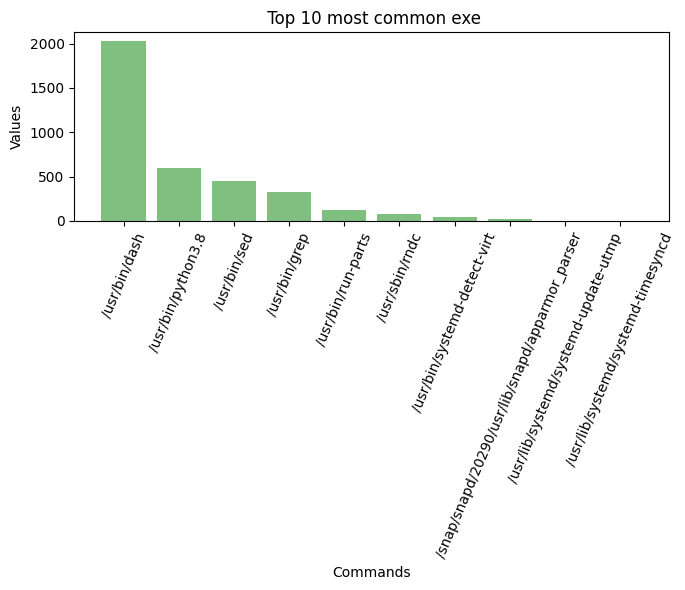

In [127]:
top_10 = dict(sorted(final_dict.items(), key=lambda item: item[1], reverse=True)[:10])

plt.figure(figsize=(7, 6))
plt.bar(top_10.keys(), top_10.values(), color='green', alpha=0.5)
plt.xlabel("Commands")
plt.ylabel("Values")
plt.title(" Top 10 most common exe")
plt.xticks(rotation=67)  
plt.tight_layout()  
plt.show()

In [152]:
unique_path = df_attack[df_attack['type'] == 'Artifact']['permissions'].unique()

final_dict = {permission: df_attack[df_attack['permissions'] == permission]['permissions'].count() for permission in unique_path}


In [153]:
final_dict

{np.float64(755.0): np.int64(292),
 np.float64(664.0): np.int64(8421),
 np.float64(nan): np.int64(0),
 np.float64(640.0): np.int64(2),
 np.float64(644.0): np.int64(34),
 np.float64(4755.0): np.int64(7),
 np.float64(777.0): np.int64(283),
 np.float64(6755.0): np.int64(4),
 np.float64(700.0): np.int64(4),
 np.float64(600.0): np.int64(8589),
 np.float64(775.0): np.int64(2),
 np.float64(440.0): np.int64(2),
 np.float64(660.0): np.int64(2)}

### Artifact Subtype

In [156]:
unique_path = df_attack[df_attack['type'] == 'Artifact']['subtype'].unique()

final_dict = {permission: df_attack[df_attack['subtype'] == permission]['subtype'].count() for permission in unique_path}

In [157]:
final_dict

{'file': np.int64(17344),
 'network socket': np.int64(10787),
 'directory': np.int64(15),
 'link': np.int64(283),
 'unknown': np.int64(18)}

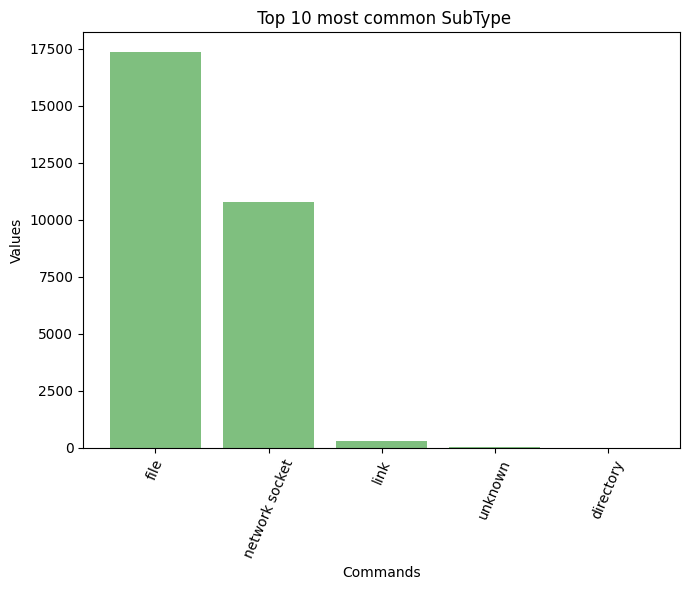

In [158]:
top_10 = dict(sorted(final_dict.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(7, 6))
plt.bar(top_10.keys(), top_10.values(), color='green', alpha=0.5)
plt.xlabel("Commands")
plt.ylabel("Values")
plt.title(" Top 10 most common SubType")
plt.xticks(rotation=67)  
plt.tight_layout()  
plt.show()

In [160]:
unique_path = df_attack[df_attack['type'] == 'Artifact']['permissions'].unique()